In [1]:
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
housing = "Housing.csv"
df = pd.read_csv(housing)

In [3]:
def h(w_0, w_1, w_2, w_3, x_1, x_2, x_3):
    return w_0 + w_1 * x_1 + w_2 * x_2 + w_3 * x_3

In [4]:
def loss_function(w_0, w_1, w_2, w_3, df):
    n = df.shape[0]
    cost = 0

    for x_1, x_2, x_3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost = cost + (h(w_0, w_1, w_2, w_3, x_1, x_2, x_3) - y) ** 2

    return cost / (2 * n)

In [6]:
def grad_step(
    w_0, w_1, w_2, w_3, grad_w_0, grad_w_1, grad_w_2, grad_w_3, learning_rate=0.001
):
    w_0 -= learning_rate * grad_w_0
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    w_3 -= learning_rate * grad_w_3
    return w_0, w_1, w_2, w_3


def grad_w_0(df, w_0, w_1, w_2, w_3):
    m = df.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += h(w_0, w_1, w_2, w_3, x1, x2, x3) - y
    return cost / m


def grad_w_1(df, w_0, w_1, w_2, w_3):
    m = df.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) * x1
    return cost / m


def grad_w_2(df, w_0, w_1, w_2, w_3):
    m = df.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) * x2
    return cost / m


def grad_w_3(df, w_0, w_1, w_2, w_3):
    m = df.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) * x3
    return cost / m


def grad_descent(
    w_0, w_1, w_2, w_3, df, num_iter, learning_rate=0.001, epsilon=0.0000001
):
    loss = loss_function(w_0, w_1, w_2, w_3, df)
    loss_history = [loss]

    for i in range(num_iter):
        d_w_0 = grad_w_0(df, w_0, w_1, w_2, w_3)
        d_w_1 = grad_w_1(df, w_0, w_1, w_2, w_3)
        d_w_2 = grad_w_2(df, w_0, w_1, w_2, w_3)
        d_w_3 = grad_w_3(df, w_0, w_1, w_2, w_3)
        w_0, w_1, w_2, w_3 = grad_step(
            w_0, w_1, w_2, w_3, d_w_0, d_w_1, d_w_2, d_w_3, learning_rate=learning_rate
        )
        loss = loss_function(w_0, w_1, w_2, w_3, df)
        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        loss_history.append(loss)
    return w_0, w_1, w_2, w_3, loss_history

In [7]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean) / value_range
        result.append(norm_x)
    return result

In [12]:
norm_df = pd.DataFrame()
norm_df["price"] = normalization(df.price)
norm_df["area"] = normalization(df.area)
norm_df["bedrooms"] = normalization(df.bedrooms)
norm_df["bathrooms"] = normalization(df.bathrooms)

w_0, w_1, w_2, w_3, loss_history = grad_descent(
    0.0, 0.0, 0.0, 0.0, norm_df, 100000, learning_rate=0.1
)

In [13]:
X = np.array([norm_df.area, norm_df.bedrooms, norm_df.bathrooms]).T
y = np.array(norm_df.price)
reg = LinearRegression().fit(X, y)

reg.score(X, y)
reg.intercept_
reg.coef_

array([0.47714269, 0.17611257, 0.36001286])

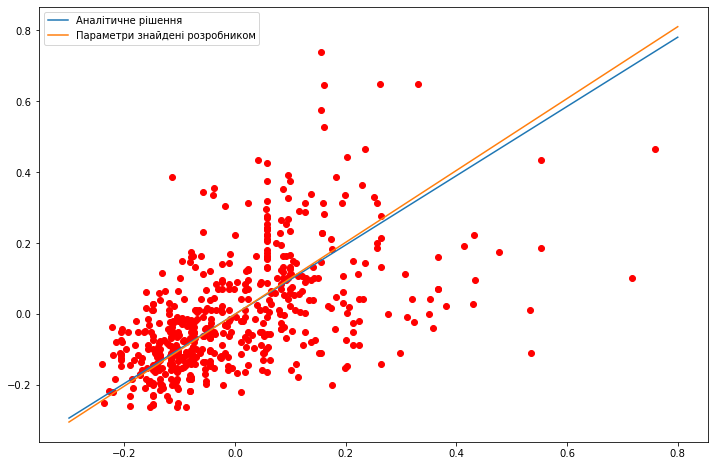

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(norm_df.area, norm_df.price, "ro")
x = np.linspace(-0.3, 0.8, 500)
plt.plot(x, h(w_0, w_1, w_2, w_3, x, x, x), label="Аналітичне рішення")
plt.plot(
    x,
    h(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], x, x, x),
    label="Параметри знайдені розробником",
)
plt.legend()
plt.show()